In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import wrangle_zillow as w
import warnings
warnings.simplefilter('ignore') 
reload(w)

<module 'wrangle_zillow' from '/Users/woody/codeup-data-science/clustering-exercises/wrangle_zillow.py'>

In [35]:
reload(w)
df = w.wrangle_zillow()
print(df.shape)
df = w.prep_zillow(df,prop_row=.8,prop_col=.8)
df = w.mark_outliers(df,'log_error',1.5)
train,validate,test = w.tvt_split(df)
train.dtypes

(77613, 69)


parcel_id                            Int64
bath_count                         Float64
bed_count                            Int64
calc_bath_and_bed                  Float64
calc_sqft                            Int64
finished_sqft12                      Int64
fips                              category
full_bath_cnt                        Int64
latitude                             Int64
longitude                            Int64
lot_sqft                             Int64
property_county_use_code            string
raw_census_tract_block             Float64
region_id_city                       Int64
region_id_county                     Int64
region_id_zip                        Int64
room_count                           Int64
year_built                           Int64
structure_tax_value                  Int64
tax_value                            Int64
assessment_year                      Int64
land_value                           Int64
tax_amount                         Float64
census_trac

<AxesSubplot:xlabel='log_error', ylabel='Count'>

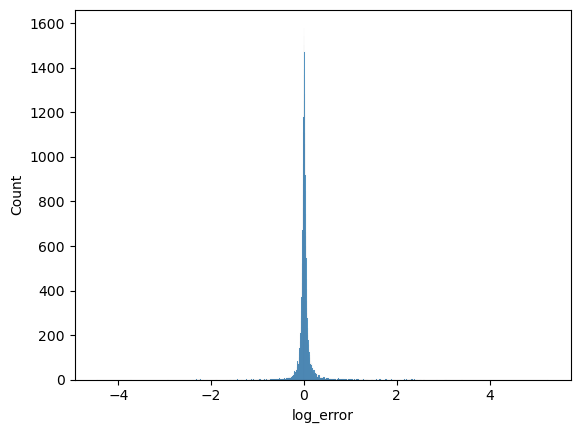

In [36]:
sns.histplot(data=train,x='log_error')

<function matplotlib.pyplot.show(close=None, block=None)>

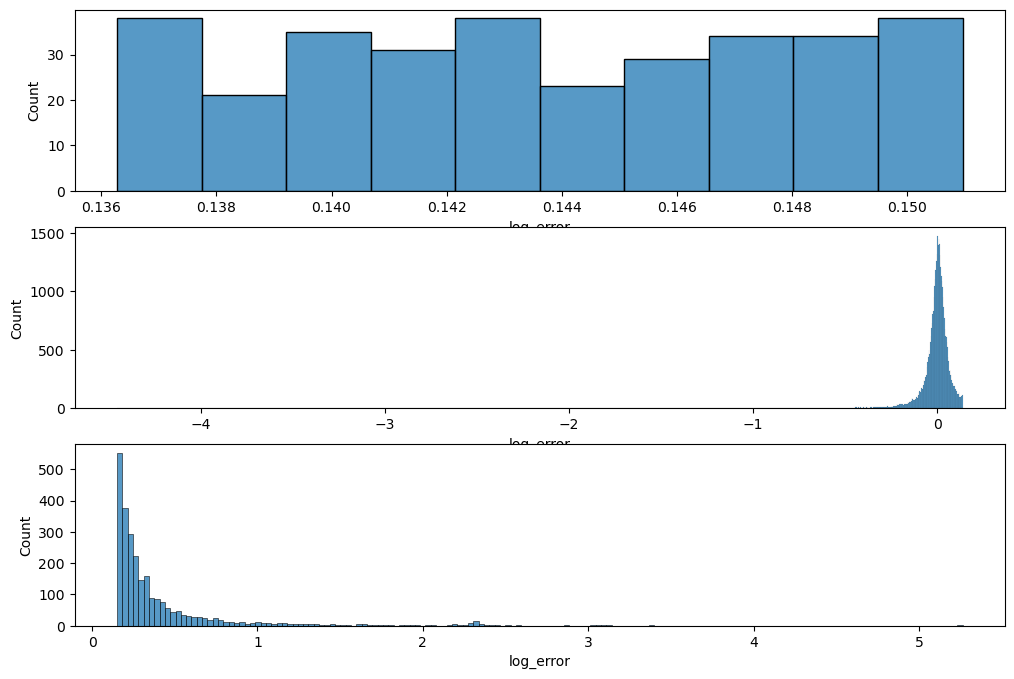

In [37]:
fig, axs = plt.subplots(3,1,figsize=(12,8))
sns.histplot(data=train[train.outliers == 'in_range'],x='log_error',ax=axs[0])
sns.histplot(data=train[train.outliers == 'lower'],x='log_error',ax=axs[1])
sns.histplot(data=train[train.outliers=='upper'],x='log_error',ax=axs[2])
plt.show

In [38]:
train.log_error.std()

0.17046001638969002